# Assigment in ML

Assignment by Group 3

1. Frame the problem and look at the big picture
2. Get the data
3. Explore the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Exploring different models
6. Fine-tune your models and combine them into a great solution
7. Present your solution
8. Launch, monitor, and maintain your system

# 1. Frame the problem and look at the big picture


# 2. Get the data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline
from math import sin, cos, sqrt, atan2, radians
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import zipfile

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nyc-taxi-trip-duration/train.zip
/kaggle/input/nyc-taxi-trip-duration/test.zip
/kaggle/input/nyc-taxi-trip-duration/sample_submission.zip


In [2]:
zf_train = zipfile.ZipFile('../input/nyc-taxi-trip-duration/train.zip')
nyc_data = pd.read_csv(zf_train.open('train.csv'))

zf_test = zipfile.ZipFile('../input/nyc-taxi-trip-duration/test.zip')
test = pd.read_csv(zf_test.open('test.csv'))

# 3. Explore the data to gain insights & 4. Prepare the data to better expose the underlying data patterns to machine learning algorithms

In [3]:
nyc_data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
nyc_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [5]:
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
nyc_data['pickup_datetime']=pd.to_datetime(nyc_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
nyc_data['dropoff_datetime']=pd.to_datetime(nyc_data['dropoff_datetime'],format='%Y-%m-%d %H:%M:%S')

In [7]:
nyc_data['pickup_date']= nyc_data['pickup_datetime'].dt.date
nyc_data['pickup_day']=nyc_data['pickup_datetime'].apply(lambda x:x.day)
nyc_data['pickup_hour']=nyc_data['pickup_datetime'].apply(lambda x:x.hour)
nyc_data['pickup_day_of_week']=nyc_data['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
nyc_data['dropoff_date']= nyc_data['dropoff_datetime'].dt.date
nyc_data['dropoff_day']=nyc_data['dropoff_datetime'].apply(lambda x:x.day)
nyc_data['dropoff_hour']=nyc_data['dropoff_datetime'].apply(lambda x:x.hour)
nyc_data['dropoff_day_of_week']=nyc_data['dropoff_datetime'].apply(lambda x:calendar.day_name[x.weekday()])

we dont care about the minuts or secondes

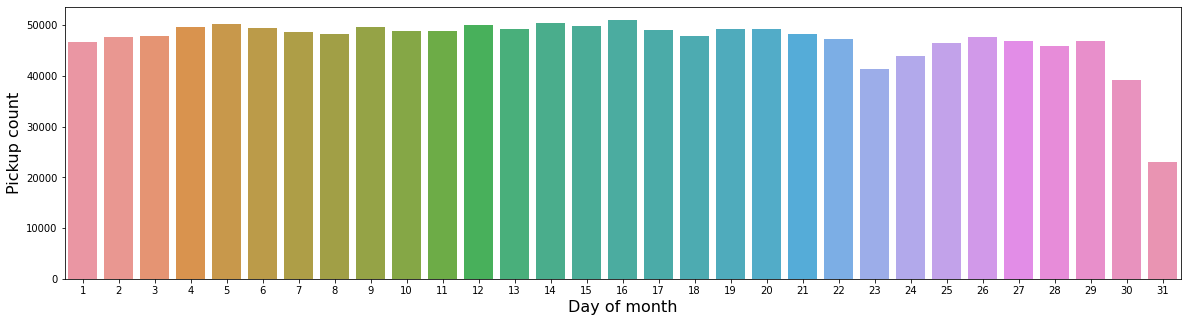

In [8]:
f = plt.figure(figsize=(20,5))
sns.countplot(x='pickup_day', data=nyc_data)
plt.xlabel('Day of month', fontsize=16)
plt.ylabel('Pickup count', fontsize=16)
plt.show()

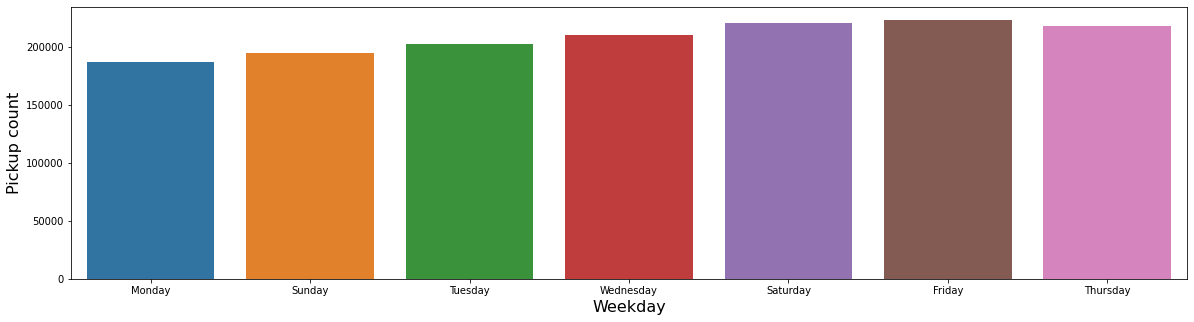

In [9]:
# Distribution of pickups over the day of week
f = plt.figure(figsize=(20,5))
sns.countplot(x='pickup_day_of_week', data=nyc_data)
plt.xlabel('Weekday', fontsize=16)
plt.ylabel('Pickup count', fontsize=16)
plt.show()

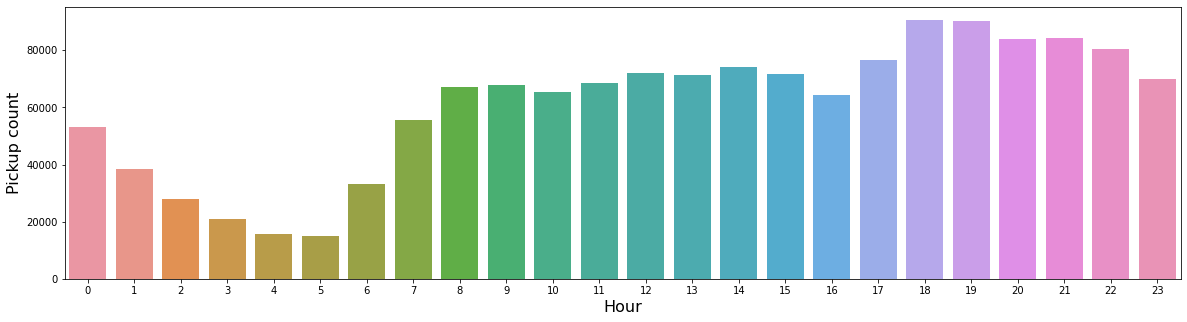

In [10]:
f = plt.figure(figsize=(20,5))
sns.countplot(x='pickup_hour', data=nyc_data)
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Pickup count', fontsize=16)
plt.show()

In [11]:
# Exploring pickup and dropoff - longitude and latitude

nyc_data['pickup_latitude_round'] = nyc_data['pickup_latitude'].apply(lambda x : round(x, 2))
nyc_data['pickup_longitude_round'] = nyc_data['pickup_longitude'].apply(lambda x : round(x, 2))

nyc_data['dropoff_latitude_round'] = nyc_data['dropoff_latitude'].apply(lambda x : round(x, 2))
nyc_data['dropoff_longitude_round'] = nyc_data['pickup_longitude'].apply(lambda x : round(x, 2))

pickup = nyc_data.groupby(['pickup_latitude_round','pickup_longitude_round'])['id'].count().reset_index().rename(columns={'id':'Num_Trips'})
dropoff = nyc_data.groupby(['dropoff_latitude_round','dropoff_longitude_round'])['id'].count().reset_index().rename(columns={'id':'Num_Trips'})

In [12]:
import folium
from folium.plugins import HeatMap

# Setting up new york coordinates
pickup_map = folium.Map(location = [40.730610,-73.935242], zoom_start = 10)

heatmap = HeatMap(list(zip(pickup.pickup_latitude_round.values, 
                           pickup.pickup_longitude_round.values,
                           pickup.Num_Trips.values.astype(float))),
                  min_opacity = 0.3,
                  radius = 5, blur = 10,
                  max_zoom = 1)

pickup_map.add_child(heatmap)

pickup_map

In [13]:
heatmap = HeatMap(list(zip(dropoff.dropoff_latitude_round.values, 
                           dropoff.dropoff_longitude_round.values,
                           dropoff.Num_Trips.values.astype(float))),
                  min_opacity = 0.3,
                  radius = 5, blur = 10,
                  max_zoom = 1)

pickup_map.add_child(heatmap)

pickup_map

In [14]:
def calculateDistance(row):
    R=6373.0 # approximate radius of earth in km
    pickup_lat=radians(row['pickup_latitude'])
    pickup_lon=radians(row['pickup_longitude'])
    dropoff_lat=radians(row['dropoff_latitude'])
    dropoff_lon=radians(row['dropoff_longitude'])
    dlon = dropoff_lon - pickup_lon
    dlat = dropoff_lat - pickup_lat
    a = sin(dlat / 2)**2 + cos(pickup_lat) * cos(dropoff_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance
    

In [15]:
nyc_data['trip_distance']=nyc_data.apply(lambda row:calculateDistance(row),axis=1)
nyc_data['trip_duration_in_hour']=nyc_data['trip_duration'].apply(lambda x:x/3600)

In [16]:
nyc_data['avg_speed_kph']=nyc_data['trip_distance']/nyc_data['trip_duration_in_hour']

Text(0.5, 1.0, 'Avg Speed (kph) vs Pickup Days of Week')

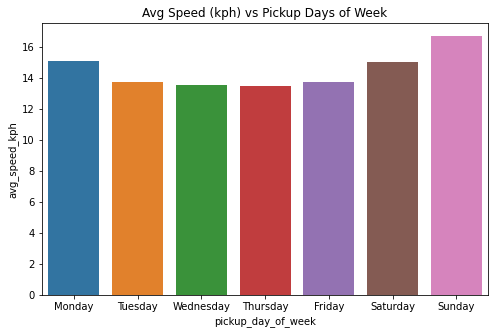

In [17]:
avg_speed_per_day=nyc_data.groupby(['pickup_day_of_week'])['avg_speed_kph'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='pickup_day_of_week',y='avg_speed_kph',data=avg_speed_per_day,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']).set_title("Avg Speed (kph) vs Pickup Days of Week")

In [18]:
drop_cols=['avg_speed_kph','trip_duration_in_hour','dropoff_date','dropoff_day','dropoff_hour','dropoff_day_of_week','dropoff_datetime','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']
training=nyc_data.drop(drop_cols,axis=1)
testing=nyc_data.drop(['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'],axis=1)


We have to predict trip_duration. We will convert this to log scale and predict

In [19]:
def encodeDays(day_of_week):
    day_dict={'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
    return day_dict[day_of_week]

In [20]:

training['pickup_day_of_week']=training['pickup_day_of_week'].apply(lambda x:encodeDays(x))
testing['pickup_day_of_week']=testing['pickup_day_of_week'].apply(lambda x:encodeDays(x))

In [21]:
training['log_trip_duration']=training['trip_duration'].apply(lambda x:np.log(x))
training.drop(['trip_duration'],axis=1,inplace=True)

In [22]:
training.to_csv("input_training.csv",index=False)
testing.to_csv("input_testing.csv",index=False)
del training
del testing
del nyc_data
del test

In [23]:
def LabelEncoding(train_df,test_df,max_levels=2):
    for col in train_df:
        if train_df[col].dtype == 'object':
            if len(list(train_df[col].unique())) <= max_levels:
                le = preprocessing.LabelEncoder()
                le.fit(train_df[col])
                train_df[col]=le.transform(train_df[col])
                test_df[col]=le.transform(test_df[col])
    return [train_df,test_df]

In [24]:

def readInputAndEncode(input_path,train_file,test_file,target_column):
    training=pd.read_csv(input_path+train_file)
    testing=pd.read_csv(input_path+test_file)
   
    training,testing=LabelEncoding(training,testing)
    
    #print("Training Data Shape after Encoding ",training.shape)
    #print("Testing Data Shape after Encoding ",testing.shape)
    #Check if all train columns are there in test data. If not add the column to test data and replace it with zero
    train_cols=training.columns.tolist()
    test_cols=testing.columns.tolist()
    col_in_train_not_test=set(train_cols)-set(test_cols)
    for col in col_in_train_not_test:
        if col!=target_column:
            testing[col]=0
    col_in_test_not_train=set(test_cols)-set(train_cols)
    for col in col_in_test_not_train:
        training[col]=0
    print("Training Data Shape after Processing ",training.shape)
    print("Testing Data Shape after Processing ",testing.shape)
    return [training,testing]

In [25]:
train,test=readInputAndEncode("",'input_training.csv','input_testing.csv','log_trip_duration')
train.drop(['pickup_date'],axis=1,inplace=True)
test.drop(['pickup_date'],axis=1,inplace=True)
train.drop(['pickup_datetime'],axis=1,inplace=True)
test.drop(['pickup_datetime'],axis=1,inplace=True)
test_id=test['id']
train.drop(['id'],axis=1,inplace=True)
test.drop(['id'],axis=1,inplace=True)

Training Data Shape after Processing  (1458644, 23)
Testing Data Shape after Processing  (1458644, 22)


In [26]:
def GetFeaturesAndSplit(train,test,target,imputing_strategy='median',split=0.25,imputation=True):
    labels=np.array(train[target])
    training=train.drop(target, axis = 1)
    training = np.array(training)
    testing=np.array(test)
    if imputation==True:
        imputer=Imputer(strategy=imputing_strategy,missing_values=np.nan)
        imputer.fit(training)
        training=imputer.transform(training)
        testing=imputer.transform(testing)
    train_features, validation_features, train_labels, validation_labels = train_test_split(training, labels, test_size = split, random_state = 42)
    return [train_features,validation_features,train_labels,validation_labels,testing]

In [27]:
train_features,validation_features,train_labels,validation_labels,testing=GetFeaturesAndSplit(train,test,'log_trip_duration',imputation=False)

In [28]:
rf = RandomForestRegressor(n_estimators = 20, random_state = 42, n_jobs=-1 )

# 6. Fine-tune your models and combine them into a great solution

In [29]:
rf.fit(train_features,train_labels)

RandomForestRegressor(n_estimators=20, n_jobs=-1, random_state=42)

# 7. Present your solution

In [30]:
valid_pred_rf=rf.predict(validation_features)
rmse=mean_squared_error(validation_labels,valid_pred_rf)
print("Root Mean Squared Error for Random Forest",rmse)

Root Mean Squared Error for Random Forest 0.20694026309870658


In [31]:
from sklearn import metrics
print('\nRandom Forest Regression Performance Metrics')
print('R^2 =',metrics.explained_variance_score(validation_labels,valid_pred_rf))
print('MAE',metrics.mean_absolute_error(validation_labels, valid_pred_rf))
print('MSE',metrics.mean_squared_error(validation_labels, valid_pred_rf))
print('RMSE',np.sqrt(metrics.mean_squared_error(validation_labels, valid_pred_rf)))


Random Forest Regression Performance Metrics
R^2 = 0.6765188055164166
MAE 0.30137792654889195
MSE 0.20694026309870658
RMSE 0.4549068729956787


In [ ]:
new_input = [[2.12309797, -1.41131072]]
# get prediction for new input
new_output = model.predict(new_input)
# summarize input and output
print(new_input, new_output)

# 8. Launch, monitor, and maintain your system

See Report